# Project Milestone P4: Creative Extension

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling
### Loading Datasets

In [2]:
# Global configuration for running
CFG = {
    "plot_heatmaps" : False,
    "cross_val" : False,
    "matching" : True
}

In [3]:
DATA_FOLDER = "data/"
ORIGINAL_PAPER_DATA = DATA_FOLDER + "SambnisImp.csv"
ORIGINAL_PAPER_COUNTRY = DATA_FOLDER + "sambanis_countries.dta"
UCDP_PRIO_DATA = DATA_FOLDER + "ucdp-prio-acd-201-csv.zip"
UCDP_ACTOR_DATA = DATA_FOLDER + "ucdp-actor-201.xlsx"
WID_DATA_FOLDER = DATA_FOLDER + "wid_all_data/"
GED_201 = DATA_FOLDER + "ged201-csv.zip"

**Dataset from Muchlinski et al. paper**

In [4]:
paper_dataset = pd.read_csv(ORIGINAL_PAPER_DATA)
paper_dataset.head()

,Unnamed: 0,atwards,X,id,cid,cowcode,year,warstds,ptime,yrint,...,decade1,decade2,decade3,decade4,independ,tip,anocracy,proxregc,sxpnew.2,sxpsq.2
0,1,0,1,1.0,1,700,1945,0,12,0,...,0,0,0,0,1,17.0,0,0.143299,0.094095,0.094095
1,2,0,2,1.0,1,700,1946,0,24,1,...,0,0,0,0,1,18.0,0,1.000000,0.094547,0.094547
2,3,0,3,1.0,1,700,1947,0,36,2,...,0,0,0,0,1,19.0,0,1.000000,0.095567,0.095567
3,4,0,4,1.0,1,700,1948,0,48,3,...,0,0,0,0,1,20.0,0,1.000000,0.101303,0.101303
4,5,0,5,1.0,1,700,1949,0,60,4,...,0,0,0,0,1,21.0,0,1.000000,0.092107,0.092107


**UDCP Dataset**

In [5]:
#ucdp_actor_data = pd.read_excel(UCDP_ACTOR_DATA, sheet_name='Dataset')
#ucdp_actor_data.head()

In [6]:
ucdp_prio_cols = ['conflict_id', 'year', 'intensity_level', 
                  'cumulative_intensity', 'type_of_conflict', 'location',
                 'territory_name']
ucdp_prio_data = pd.read_csv(UCDP_PRIO_DATA, usecols=ucdp_prio_cols)
ucdp_prio_data.head()

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
0,11342,India,Garoland,2012,1,0,3
1,11342,India,Garoland,2014,1,0,3
2,11343,"Egypt, Israel",Suez/Sinai,1967,2,1,2
3,11343,"Egypt, Israel",Suez/Sinai,1969,1,1,2
4,11343,"Egypt, Israel",Suez/Sinai,1970,1,1,2


**GED Dataset**

In [7]:
ged_201 = pd.read_csv(GED_201, usecols=['conflict_new_id','country','year'])
ged_201

,year,conflict_new_id,country
0,2017,259,Afghanistan
1,1989,333,Afghanistan
2,1989,333,Afghanistan
3,1989,333,Afghanistan
4,1989,333,Afghanistan
...,...,...,...
225380,1989,562,Zimbabwe (Rhodesia)
225381,1989,562,Zimbabwe (Rhodesia)
225382,1990,562,Zimbabwe (Rhodesia)
225383,1990,562,Zimbabwe (Rhodesia)


In [8]:
#ged_201['country']
#ged_201[ged_201['conflict_new_id']==418]['country']
#ged_201.loc[221865]

## Plotting variables to visually check correlation with oil

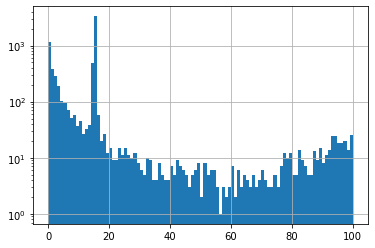

In [9]:
paper_dataset["fuelexp"].hist(bins=100).set_yscale('log')

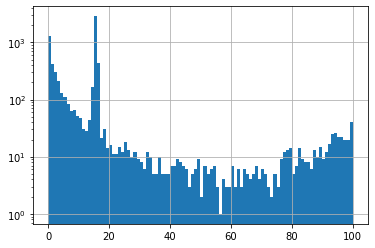

In [10]:
paper_dataset["fuel"].hist(bins=100).set_yscale('log')

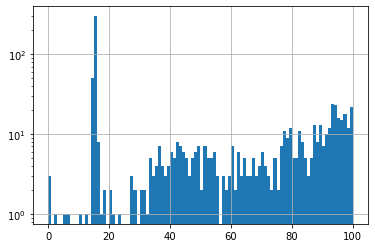

In [11]:
paper_dataset[paper_dataset["oil"] == 1]["fuelexp"].hist(bins=100).set_yscale('log')

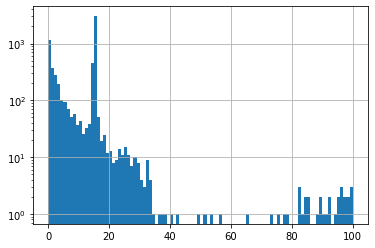

In [12]:
paper_dataset[paper_dataset["oil"] == 0]["fuelexp"].hist(bins=100).set_yscale('log')

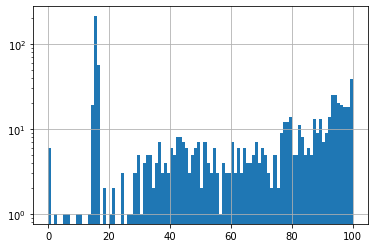

In [13]:
paper_dataset[paper_dataset["oil"] == 1]["fuel"].hist(bins=100).set_yscale('log')

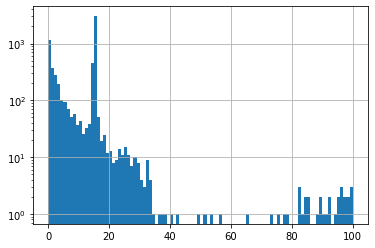

In [14]:
paper_dataset[paper_dataset["oil"] == 0]["fuelexp"].hist(bins=100).set_yscale('log')

In [15]:
# cid uniquely identifies a country, however in some cases when a country splits we have the 
# same CID for 2 different names in different years. This might be solved by joining on (year, cid)

paper_data_countries = pd.read_stata(ORIGINAL_PAPER_COUNTRY, columns=["country", "cid", "year"]).drop_duplicates()
#paper_data_countries.sample(10)
#paper_data_countries[paper_data_countries[["year", "cid"]].duplicated(keep=False)]

#paper_data_countries[paper_data_countries["country"] == "Czechoslovakia"]

In [16]:
# Note to future selves: we lost Korea 1945-1949
paper_data_merged = paper_data_countries.merge(paper_dataset, on=["cid", "year"])

In [17]:
paper_data_merged.sample(10)

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,decade1,decade2,decade3,decade4,independ,tip,anocracy,proxregc,sxpnew.2,sxpsq.2
542,Belgium,15.0,1990.0,543,0,830,12.0,211,0,552,...,0,0,0,1,1,161.0,0,0.000000e+00,-0.235111,-0.235111
127,Algeria,3.0,1977.0,128,0,145,2.0,615,0,186,...,0,1,0,0,1,15.0,0,3.730000e-09,1.263814,1.263814
2816,Iceland,68.0,1998.0,2817,0,3806,62.0,395,0,648,...,0,0,0,1,1,55.0,0,0.000000e+00,0.088610,0.088610
6906,Yemen AR,167.0,1947.0,6907,0,9299,156.0,678,0,36,...,0,0,0,0,1,22.0,0,1.000000e+00,0.111579,0.111579
1009,Cameroon,27.0,1984.0,1010,0,1496,24.0,471,0,300,...,0,0,1,0,1,24.0,0,1.420000e-14,0.099406,0.099406
1828,Ecuador,45.0,1994.0,1829,0,2514,40.0,130,0,600,...,0,0,0,1,1,141.0,0,3.730000e-09,0.423723,0.423723
783,Brazil,22.0,1983.0,784,0,1215,19.0,140,0,468,...,0,0,1,0,1,52.0,1,1.530000e-05,-1.039215,-1.039215
6970,Yemen PR,168.0,1988.0,6971,0,9396,157.0,680,0,263,...,0,0,1,0,1,21.0,0,9.090000e-13,0.100661,0.100661
1296,China,33.0,1995.0,1297,0,1843,30.0,710,0,557,...,0,0,0,1,1,26.0,0,8.080000e-28,-1.082788,-1.082788
5012,Peru,120.0,1945.0,5013,0,6665,108.0,135,0,12,...,0,0,0,0,1,14.0,0,1.432434e-01,0.093055,0.093055


In [18]:
paper_data_merged[["country", "fuelexp", ]]

,country,fuelexp
0,Afghanistan,15.387903
1,Afghanistan,15.594645
2,Afghanistan,15.601810
3,Afghanistan,15.739340
4,Afghanistan,15.525010
...,...,...
7135,Zimbabwe,1.030000
7136,Zimbabwe,1.510000
7137,Zimbabwe,1.460000
7138,Zimbabwe,15.314596


#### Heatmaps

In [19]:
def plot_val_by_country_year(df, val, years=None):
    pivot = pd.pivot_table(data=df, columns=["year"], index="country", values=[val])
    pivot.columns = [int(x[1]) for x in pivot.columns]
    
    if years:
        pivot_slice = pivot[years]
    else:
        pivot_slice = pivot
    
    plt.figure(figsize=(20, 40))
    ax = sns.heatmap(pivot_slice, cmap='RdYlGn_r', linewidths=0.5)
    ax.set_title(val)
    plt.show()

In [20]:
if CFG["plot_heatmaps"]:
    plot_val_by_country_year(paper_data_merged, "fuelexp", years=range(1964, 2001))
    plot_val_by_country_year(paper_data_merged, "illiteracy", years=range(1971, 2001))
    plot_val_by_country_year(paper_data_merged, "infant", years=range(1966, 2001))
    plot_val_by_country_year(paper_data_merged, "life", years=range(1961, 2001))
    #plot_val_by_country_year(paper_data_merged, "gdpgrowth")

## Data wrangling for wars in territories

1. Get a row for each territory there was a war in for each year
2. For each country that was at war, match name with existing database
2. We need some data cleaning: US never had a war in its territory!
3. For each year, add a 'war in' column in the existing database for each country + intensity level


In [21]:
# 1 extra-systemic (state vs non-state in state territory to keep control of the system) <- colonies
# 2 inter-state  
# 3 intra-state
# 4 intra-state internationalized

In [22]:
ucdp_prio_data.columns

Index(['conflict_id', 'location', 'territory_name', 'year', 'intensity_level',
       'cumulative_intensity', 'type_of_conflict'],
      dtype='object')

In [23]:
len(ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 1) & (ucdp_prio_data.cumulative_intensity == 0)]) # In this case, war is fought in location : we got this

50

In [24]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 1] # In this case, war is fought in location : we got this

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
154,201,Cambodia (Kampuchea),Cambodia,1946,1,0,1
155,201,Cambodia (Kampuchea),Cambodia,1947,1,0,1
156,201,Cambodia (Kampuchea),Cambodia,1948,1,0,1
157,201,Cambodia (Kampuchea),Cambodia,1949,1,0,1
158,201,Cambodia (Kampuchea),Cambodia,1950,1,0,1
...,...,...,...,...,...,...,...
1103,285,Mozambique,Mozambique,1974,1,1,1
1104,286,South Yemen,Aden/South Yemen,1964,1,0,1
1105,286,South Yemen,Aden/South Yemen,1965,1,0,1
1106,286,South Yemen,Aden/South Yemen,1966,1,0,1


In [25]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 2] # No clear idea: however, only 48 conflicts: we can classify manually

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
2,11343,"Egypt, Israel",Suez/Sinai,1967,2,1,2
3,11343,"Egypt, Israel",Suez/Sinai,1969,1,1,2
4,11343,"Egypt, Israel",Suez/Sinai,1970,1,1,2
5,11343,"Egypt, Israel",Suez/Sinai,1973,2,1,2
31,11348,"South Sudan, Sudan",Common border,2012,1,0,2
...,...,...,...,...,...,...,...
2277,409,"Eritrea, Ethiopia",Common border,2016,1,1,2
2354,420,"Australia, Iraq, United Kingdom, United States...",NaN,2003,2,1,2
2401,427,"Tanzania, Uganda",Kagera Salient,1978,1,0,2
2414,431,"Afghanistan, Russia (Soviet Union)",NaN,1979,1,0,2


In [26]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 3] # In this case, war is fought in location : we got this

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
0,11342,India,Garoland,2012,1,0,3
1,11342,India,Garoland,2014,1,0,3
6,11344,Sudan,Abyei,2011,1,0,3
7,11345,South Sudan,NaN,2011,1,0,3
8,11345,South Sudan,NaN,2012,1,0,3
...,...,...,...,...,...,...,...
2442,440,Myanmar (Burma),Lahu,1979,1,0,3
2443,440,Myanmar (Burma),Lahu,1980,1,0,3
2444,440,Myanmar (Burma),Lahu,1981,1,0,3
2445,440,Myanmar (Burma),Lahu,1982,1,0,3


In [27]:
ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 3) & (ucdp_prio_data.intensity_level == 1) & (ucdp_prio_data.location == 'United Kingdom')]

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
1499,315,United Kingdom,Northern Ireland,1971,1,0,3
1500,315,United Kingdom,Northern Ireland,1972,1,0,3
1501,315,United Kingdom,Northern Ireland,1973,1,0,3
1502,315,United Kingdom,Northern Ireland,1974,1,0,3
1503,315,United Kingdom,Northern Ireland,1975,1,0,3
1504,315,United Kingdom,Northern Ireland,1976,1,0,3
1505,315,United Kingdom,Northern Ireland,1977,1,0,3
1506,315,United Kingdom,Northern Ireland,1978,1,1,3
1507,315,United Kingdom,Northern Ireland,1979,1,1,3
1508,315,United Kingdom,Northern Ireland,1980,1,1,3


In [28]:
ucdp_prio_data[(ucdp_prio_data.type_of_conflict != 2) & (ucdp_prio_data.location.str.contains('United States'))]

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
705,238,United States of America,Puerto Rico,1950,1,0,1
2332,418,United States of America,NaN,2001,2,1,4
2333,418,United States of America,NaN,2002,1,1,4
2334,418,United States of America,NaN,2003,1,1,4
2335,418,United States of America,NaN,2004,1,1,4
2336,418,United States of America,NaN,2005,1,1,4
2337,418,United States of America,NaN,2006,1,1,4
2338,418,United States of America,NaN,2007,1,1,4
2339,418,United States of America,NaN,2008,1,1,4
2340,418,United States of America,NaN,2009,1,1,4


In [29]:
# Idea: always match countries with others that have the same intensity of war. Keep all intensities. 

## Selecting useful columns from datasets and merging on conflict id
To know the geographic location of war we merge the USCP/PRIO dataset with the disgragated dataset(ged-201) in order to have a new dataset with important information for data analysis. So we did a filtering on the columns of the two datasets and we merged using the feature conflic_id_new, for the disgragated dataset, and the feature conflict_id for the USCD/PRIO dataset. These two features are fully compatible and identify a specific conflict.
Using USCP dataset we select conflicts with types of conflict equal to 1, 3 or 4 (extrasystemic, intrastate, internationalzed intrastate) because in these cases the location correspond to the geografic location which is not true in general. For conflicts of type 2 (interstates) we use the merging as described above for conflicts starting from 1989, for the others we 'build' the geographic location manually using the geografic area. 

In [30]:
ged_filtered = ged_201[['conflict_new_id','country','year']].copy()
ucdp_filters = ucdp_prio_data[['conflict_id','year', 'intensity_level', 'cumulative_intensity',
       'type_of_conflict']].copy()
conflict_merged = pd.merge(ged_201, ucdp_prio_data, left_on= ['conflict_new_id','year'], right_on =['conflict_id','year']).drop_duplicates()

In [31]:
conflict_merged[(conflict_merged['year']>1959) & (conflict_merged['year']<=2000)]

,year,conflict_new_id,country,conflict_id,location,territory_name,intensity_level,cumulative_intensity,type_of_conflict
529,1989,333,Afghanistan,333,Afghanistan,NaN,2,1,4
666,1990,333,Afghanistan,333,Afghanistan,NaN,2,1,3
705,1991,333,Afghanistan,333,Afghanistan,NaN,2,1,3
765,1992,333,Afghanistan,333,Afghanistan,NaN,2,1,3
834,1996,333,Afghanistan,333,Afghanistan,NaN,2,1,3
...,...,...,...,...,...,...,...,...,...
162376,1994,314,Uganda,314,Uganda,NaN,1,1,3
163519,1991,315,United Kingdom,315,United Kingdom,Northern Ireland,1,1,3
163539,1998,315,United Kingdom,315,United Kingdom,Northern Ireland,1,1,3
163548,1992,277,Venezuela,277,Venezuela,NaN,1,0,3


In [32]:
if "conflict_new_id" in conflict_merged:
    conflict_merged.drop('conflict_new_id', axis=1, inplace=True)
    print ("Done")

Done


In [33]:
#conflict_merged[conflict_merged['conflict_id']==315]
#ged_201[ged_201['conflict_new_id']==315].year
ged_201['year'].min() # TODO: remove GED?

1989

#### Selecting conflicts of types (1,3,4)

In [34]:
ucdp_prio_data_new = ucdp_prio_data[(ucdp_prio_data['year']>1960) & (ucdp_prio_data['year']<=2000)]
ucdp_prio_data_134 = ucdp_prio_data_new[ucdp_prio_data_new['type_of_conflict'] != 2]

In [35]:
ucdp_prio_data_2 = ucdp_prio_data_new[ucdp_prio_data_new['type_of_conflict'] == 2]
ucdp_prio_data_2

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
2,11343,"Egypt, Israel",Suez/Sinai,1967,2,1,2
3,11343,"Egypt, Israel",Suez/Sinai,1969,1,1,2
4,11343,"Egypt, Israel",Suez/Sinai,1970,1,1,2
5,11343,"Egypt, Israel",Suez/Sinai,1973,2,1,2
286,218,"India, Pakistan",Kashmir,1964,1,1,2
...,...,...,...,...,...,...,...
2274,409,"Eritrea, Ethiopia",Common border,1998,2,1,2
2275,409,"Eritrea, Ethiopia",Common border,1999,2,1,2
2276,409,"Eritrea, Ethiopia",Common border,2000,2,1,2
2401,427,"Tanzania, Uganda",Kagera Salient,1978,1,0,2


#### Selecting conflicts of type 2 after the 1989

In [36]:
ucdp_prio_data_2[ucdp_prio_data_2['year']>1988].head()

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
291,218,"India, Pakistan",Kashmir,1989,1,1,2
292,218,"India, Pakistan",Kashmir,1990,1,1,2
293,218,"India, Pakistan",Kashmir,1991,1,1,2
294,218,"India, Pakistan",Kashmir,1992,1,1,2
295,218,"India, Pakistan",Kashmir,1996,1,1,2


In [37]:
ucdp_2_after1989 = pd.merge(ged_filtered, ucdp_prio_data_2, 
                            left_on= ['conflict_new_id','year'], 
                            right_on =['conflict_id','year']).drop_duplicates()

In [38]:
ucdp_2_after1989.drop(["conflict_new_id", "location"], axis=1, inplace=True)

In [39]:
# drop "location" and rename country to "location". Now location is geographical location
ucdp_2_after1989.rename(columns = {"country" : "location"}, inplace=True)
ucdp_2_after1989

,location,year,conflict_id,territory_name,intensity_level,cumulative_intensity,type_of_conflict
0,Cameroon,1996,405,Bakassi,1,0,2
3,Ecuador,1995,403,Cordillera del Condor,1,0,2
7,Peru,1995,403,Cordillera del Condor,1,0,2
29,Eritrea,1998,409,Common border,2,1,2
32,Ethiopia,1998,409,Common border,2,1,2
40,Eritrea,1999,409,Common border,2,1,2
51,Ethiopia,1999,409,Common border,2,1,2
54,Eritrea,2000,409,Common border,2,1,2
60,Ethiopia,2000,409,Common border,2,1,2
62,India,1989,218,Kashmir,1,1,2


#### Selecting manually the location of interstate conflicts (2) before 1989

In [40]:
ucdp_prio_data_2[ucdp_prio_data_2['year']<1970].head()

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
2,11343,"Egypt, Israel",Suez/Sinai,1967,2,1,2
3,11343,"Egypt, Israel",Suez/Sinai,1969,1,1,2
286,218,"India, Pakistan",Kashmir,1964,1,1,2
287,218,"India, Pakistan",Kashmir,1965,2,1,2
951,268,"Ethiopia, Somalia",Ogaden,1964,1,0,2


In [41]:
ucdp_before_1970 = ucdp_prio_data_2[ucdp_prio_data_2['year']<1970].copy()
ucdp_before_1970["location"] = ucdp_before_1970["location"].str.split(', ')

In [42]:
ucdp_before_1970_exp = ucdp_before_1970.explode("location")
ucdp_before_1970_exp.index = range(2500, 2500+len(ucdp_before_1970_exp))

In [43]:
udcp_before_1970_manual = ucdp_before_1970_exp.drop([
    2501, # Israel Suez
    2503, # Israel Suez
    2509, # Somalia Ogaden
    2510, # France 1961 (vs Tunisia)
    2517, # France 1961 (vs Tunisia)
    2529, # North Vietnam 1965
    2531, # North Vietnam 1965
    2533, # North Vietnam 1965
    2535, # North Vietnam 1965
    2537, # North Vietnam 1965
    2540, # Israel Golan
])

In [44]:
df_1988 = ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 2) & (ucdp_prio_data.year >= 1980) & (ucdp_prio_data.year<=1988)].copy()
df_1988["location"] = df_1988["location"].str.split(', ')
df_1988_exploded = df_1988.explode("location")
df_1988_exploded.index = range(2700, 2700+len(df_1988_exploded))
udcp_before_1988_manual = df_1988_exploded.drop([2739, 2743, 2707])

In [45]:
ucdp_before_1980 = ucdp_prio_data_2[(ucdp_prio_data_2['year']>1970) & (ucdp_prio_data_2['year']<1980)].copy()
ucdp_before_1980["location"] = ucdp_before_1980["location"].str.split(', ')
ucdp_before_1980_exp = ucdp_before_1980.explode("location")
ucdp_before_1980_exp.index = list(range(2600, 2600+len(ucdp_before_1980_exp)))
ucdp_before_1980_manual = ucdp_before_1980_exp.drop([2601 # Israel Suez
                           ,2605 # Somalia Ogaden
                           ,2607,# Somalia Ogaden
                           2609, # Somalia Ogaden
                           2611, #North Vietnam
                           2613, #North Vietnam
                           2615, #North Vietnam
                           2617, #North Vietnam
                           2622, #Israel Golan
                           2629, #Turkey north cyprus
                           2645, #Uganda Kagera Salient
                           2647, #Russia
                          ])

In [46]:
ucdp_manual = pd.concat([udcp_before_1970_manual, ucdp_before_1980_manual, udcp_before_1988_manual])

In [47]:
ucdp_conflict_level2 = pd.concat([ucdp_manual, ucdp_2_after1989])

In [48]:
ucdp_conflict_level2.sample(10)

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
2732,334,China,Various,1986,1,1,2
2538,301,Israel,West Bank,1967,2,1,2
2634,328,Cambodia (Kampuchea),Common Border,1976,1,0,2
2500,11343,Egypt,Suez/Sinai,1967,2,1,2
2543,304,Myanmar (Burma),Common Border,1969,1,0,2
2623,302,Syria,Golan Heights,1973,2,1,2
86,218,India,Kashmir,1997,1,1,2
2738,346,Argentina,Malvinas/Falkland Islands,1982,1,0,2
2621,294,Thailand,Common Border,1978,1,0,2
2744,355,Burkina Faso,Agacher Strip,1985,1,0,2


In [49]:
filtercols = ["location", "year", "conflict_id", "intensity_level", 
              "cumulative_intensity", "territory_name"]#, "region"]
ucdp_wrangled = pd.concat([ucdp_prio_data_134, ucdp_conflict_level2])[filtercols].sort_values(by="year")

In [50]:
ucdp_wrangled

,location,year,conflict_id,intensity_level,cumulative_intensity,territory_name
748,Algeria,1961,246,2,1,Algeria
325,Myanmar (Burma),1961,221,1,1,Karen
387,Myanmar (Burma),1961,222,1,1,NaN
438,Myanmar (Burma),1961,223,1,0,Arakan
472,Myanmar (Burma),1961,224,1,0,Mon
...,...,...,...,...,...,...
2144,Algeria,2000,386,1,1,NaN
1738,Afghanistan,2000,333,2,1,NaN
1078,DR Congo (Zaire),2000,283,2,1,NaN
1625,Angola,2000,327,2,1,NaN


In [51]:
#paper_features = ["country", "life", "fuelexp", "year", "illiteracy", "infant"]

In [52]:
# Standardize names
name_map = {
    "Bosnia" : "Bosnia-Herzegovina",
    "Cambodia (Kampuchea)" : "Cambodia",
    "Congo" : "Congo (Braz)",
    "Zaire/Congo" : "DR Congo (Zaire)",
    "Guinea Bissau" : "Guinea-Bissau",
    "Papua NG" : "Papua New Guinea",
    "Madagascar (Malagasy)" : "Madagascar",
    "Myanmar/Burma" : "Myanmar (Burma)",
    "USSR/Russia" : "Russia (Soviet Union)",
    "Serbia (Yugoslavia)" : "Yugoslavia",
    "Trinidad" : "Trinidad and Tobago",
    "United Kingdom" : "U.K.",
    "Yemen (North Yemen)" : "Yemen", # TODO: review
    "South Yemen" : "Yemen", # TODO: review
    "Zimbabwe (Rhodesia)" : "Zimbabwe",
    "Vietnam (North Vietnam)" : "Vietnam"
}


# substitute names
#paper_wellbeing = paper_data_merged[paper_features].copy()
paper_wellbeing = paper_data_merged#.copy()
paper_wellbeing.country = [name_map.get(x, x) for x in paper_wellbeing.country]
ucdp_wrangled.location = [name_map.get(x, x) for x in ucdp_wrangled.location]

# year as int
paper_wellbeing.year = paper_wellbeing.year.astype(int)

# rename Vietnam before unification to South Vietnam
# Data before unification is very likely only from South Vietnam
vietnam_index = paper_wellbeing[(paper_wellbeing["country"] == "Vietnam") & (paper_wellbeing["year"] < 1976)].index
paper_wellbeing.loc[vietnam_index, "country"] = "South Vietnam"

In [53]:
# drop North Vietnam before 1976
ucdp_wrangled.drop([2639, 2633], inplace=True)

In [54]:
# change Russia to USSR in 1990 and 1991 (this is likely a mistake)
russia_index = paper_wellbeing[(paper_wellbeing["country"] == "Russia") & (paper_wellbeing["year"] <= 1991)].index
paper_wellbeing.loc[russia_index, "country"] = "Russia (Soviet Union)"

# change USSR after 1992 to Russia
ussr_index = ucdp_wrangled[(ucdp_wrangled["location"] == "Russia (Soviet Union)") & (ucdp_wrangled["year"] > 1991)].index
ucdp_wrangled.loc[ussr_index, "location"] = "Russia"

In [55]:
ucdp_paper_outerjoin = paper_wellbeing.merge(ucdp_wrangled, how='outer', left_on=["country", "year"], right_on=["location", "year"])

In [56]:
ucdp_paper_outerjoin

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,tip,anocracy,proxregc,sxpnew.2,sxpsq.2,location,conflict_id,intensity_level,cumulative_intensity,territory_name
0,Afghanistan,1.0,1945,1.0,0.0,1.0,1.0,700.0,0.0,12.0,...,17.0,0.0,0.143299,0.094095,0.094095,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1.0,1946,2.0,0.0,2.0,1.0,700.0,0.0,24.0,...,18.0,0.0,1.000000,0.094547,0.094547,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1.0,1947,3.0,0.0,3.0,1.0,700.0,0.0,36.0,...,19.0,0.0,1.000000,0.095567,0.095567,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1.0,1948,4.0,0.0,4.0,1.0,700.0,0.0,48.0,...,20.0,0.0,1.000000,0.101303,0.101303,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1.0,1949,5.0,0.0,5.0,1.0,700.0,0.0,60.0,...,21.0,0.0,1.000000,0.092107,0.092107,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,NaN,NaN,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yemen,230.0,1.0,1.0,NaN
7604,NaN,NaN,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yemen,359.0,2.0,1.0,NaN
7605,NaN,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Sierra Leone,382.0,1.0,1.0,NaN
7606,NaN,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Algeria,386.0,1.0,1.0,NaN


In [57]:
x = ucdp_paper_outerjoin.country.unique().astype(str)
y = ucdp_paper_outerjoin.location.unique().astype(str)
print("in x, not in y:\n", np.setdiff1d(x, y))
print("in y, not in x:\n", np.setdiff1d(y, x))

in x, not in y:
 ['Albania' 'Armenia' 'Australia' 'Austria' 'Bahamas' 'Bahrain' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Botswana' 'Brazil'
 'Bulgaria' 'C.A.R.' 'Canada' 'Cape Verde' 'Costa Rica' 'Czech Republic'
 'Czechoslovakia' 'Denmark' 'Estonia' 'Fiji' 'Finland' 'Germany' 'Greece'
 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Ivory Coast' 'Jamaica'
 'Japan' 'Kazakhstan' 'Korea, South' 'Kyrgyzstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Macedonia' 'Malawi' 'Malta' 'Mauritius' 'Mongolia'
 'Namibia' 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal'
 'Qatar' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia' 'Solomon Islands'
 'Swaziland' 'Sweden' 'Switzerland' 'Taiwan' 'Turkmenistan' 'U.A.R.'
 'U.S.A.' 'Ukraine' 'Vanuatu' 'Western Samoa' 'Yemen AR' 'Yemen PR'
 'Zambia']
in y, not in x:
 ['Brunei']


In [58]:
joined = ucdp_paper_outerjoin.copy()

In [59]:
joined.loc[joined.country.isnull(), "country"] = joined.loc[joined.country.isnull(), "location"]

In [60]:
if "location" in joined:
    joined.drop("location", inplace=True, axis=1)
    print("Done")

Done


In [61]:
joined["war"] = (~joined.conflict_id.isnull()).astype(int)

In [62]:
joined

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,tip,anocracy,proxregc,sxpnew.2,sxpsq.2,conflict_id,intensity_level,cumulative_intensity,territory_name,war
0,Afghanistan,1.0,1945,1.0,0.0,1.0,1.0,700.0,0.0,12.0,...,17.0,0.0,0.143299,0.094095,0.094095,NaN,NaN,NaN,NaN,0
1,Afghanistan,1.0,1946,2.0,0.0,2.0,1.0,700.0,0.0,24.0,...,18.0,0.0,1.000000,0.094547,0.094547,NaN,NaN,NaN,NaN,0
2,Afghanistan,1.0,1947,3.0,0.0,3.0,1.0,700.0,0.0,36.0,...,19.0,0.0,1.000000,0.095567,0.095567,NaN,NaN,NaN,NaN,0
3,Afghanistan,1.0,1948,4.0,0.0,4.0,1.0,700.0,0.0,48.0,...,20.0,0.0,1.000000,0.101303,0.101303,NaN,NaN,NaN,NaN,0
4,Afghanistan,1.0,1949,5.0,0.0,5.0,1.0,700.0,0.0,60.0,...,21.0,0.0,1.000000,0.092107,0.092107,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,Yemen,NaN,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,230.0,1.0,1.0,NaN,1
7604,Yemen,NaN,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,359.0,2.0,1.0,NaN,1
7605,Sierra Leone,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,382.0,1.0,1.0,NaN,1
7606,Algeria,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,386.0,1.0,1.0,NaN,1


## Income inequality

In [63]:
import glob
ineq_csv_files = glob.glob(WID_DATA_FOLDER + '/*_data*.csv')

wid_gini_usecols = ["country", "year", "variable", "value"]
ineq_df_list = [pd.read_csv(csv, sep=';', keep_default_na=False, usecols=wid_gini_usecols) 
                for csv in ineq_csv_files]

In [64]:
# get country indices
ineq_countries = pd.read_csv(WID_DATA_FOLDER + '/WID_countries.csv', sep=';', usecols=["alpha2", "shortname"])
ineq_countries_map = {code : name for code, name in zip(ineq_countries["alpha2"], ineq_countries["shortname"])}
ineq_countries_map

{'AM': 'Armenia',
 'AN': 'Netherlands Antilles',
 'AO': 'Angola',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia and Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BM': 'Bermuda',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CD': 'DR Congo',
 'CF': 'Central African Republic',
 'CG': 'Congo',
 'CH': 'Switzerland',
 'CI': "Cote d'Ivoire",
 'CK': 'Cook Islands',
 'CL': 'Chile',
 'CM': 'Cameroon',
 'CN': 'China',
 'CN-RU': 'Rural China',
 'CN-UR': 'Urban China',
 'CO': 'Colombia',
 'CR': 'Costa Rica',
 'CS': 'Czechoslovakia',
 'CU': 'Cuba',
 'CV': 'Cabo Verde',
 'CW': 'Curacao',
 'CY': 'Cyprus',
 'CZ': 'Czech Republic',
 'DD': 'German Democratic Republic',
 'DE

In [65]:
ineq_full_raw = pd.concat(ineq_df_list) # join all files

# filter interesting rows
ineq_gini = ineq_full_raw[(ineq_full_raw["variable"] == "gptinc992j") & 
                          (ineq_full_raw["year"] > 1960) & 
                          (ineq_full_raw["year"] <= 2000)].copy()

del ineq_full_raw # free up some memory
ineq_gini

,country,variable,year,value
8930,XL,gptinc992j,1980,0.646557
8931,XL,gptinc992j,1981,0.646571
8932,XL,gptinc992j,1982,0.646842
8933,XL,gptinc992j,1983,0.646795
8934,XL,gptinc992j,1984,0.646651
...,...,...,...,...
33240,QP-MER,gptinc992j,1996,0.545945
33241,QP-MER,gptinc992j,1997,0.551965
33242,QP-MER,gptinc992j,1998,0.553670
33243,QP-MER,gptinc992j,1999,0.558810


In [66]:
# rename country code with country names
ineq_gini.country = [ineq_countries_map.get(c, c) for c in ineq_gini.country]

# rename gini column
ineq_gini.rename(columns = {"value" : "gini"}, inplace=True)

ineq_gini.sample(5)

,country,variable,year,gini
56798,Bosnia and Herzegovina,gptinc992j,2000,0.423275
9577,DR Congo,gptinc992j,1994,0.619634
7410,Middle East and Northern Africa,gptinc992j,1998,0.712567
86747,Hungary,gptinc992j,1987,0.153402
56785,Bosnia and Herzegovina,gptinc992j,1987,0.361622


In [67]:
if "variable" in ineq_gini:
    ineq_gini.drop("variable", axis=1, inplace=True)
    print("Done")

Done


In [68]:
x = ineq_gini.country.unique().astype(str)
y = joined.country.unique().astype(str)

In [69]:
ineq_rename = {
    "Bosnia and Herzegovina" : "Bosnia-Herzegovina",
    "Cabo Verde" : "Cape Verde",
    "Central African Republic" : "C.A.R.",
    "Congo" : "Congo (Braz)",
    "DR Congo" : "DR Congo (Zaire)",
    "German Democratic Republic" : "Germany",
    "Russian Federation" : "Russia",
    "Syrian Arab Republic" : "Syria",
    "USA" : "U.S.A.",
    "United Kingdom" : "U.K.",
    "United Arab Emirated" : "U.A.R.",
    "Cote d'Ivoire" : "Ivory Coast"
}

regions_map = {
    'Asia (excl. Middle East)' : ["Afghanistan", 'Kazakhstan', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'Indonesia', 'Japan', 'Korea, South',
                                   'Kyrgyzstan', 'Laos', 'Malaysia', 'Mongolia',
                                   'Myanmar (Burma)', 'Nepal', 'Pakistan', 'Philippines', 'Singapore', 
                                  'South Vietnam', 'Sri Lanka', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan', 'Vietnam'],
    "Latin America" : ["Argentina", 'Belize', 'Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Cuba', "Chile", 
                        'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
                      'Jamaica', 'Mexico', 'Nicaragua', 'Paraguay', 'Peru', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Panama'],
    "Eastern Europe" : ["Armenia", 'Azerbaijan', 'Czechoslovakia', 'Belarus', 'Yugoslavia'],
    "Oceania" : ['Australia', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Western Samoa', 'Papua New Guinea'],
    "Northern America" : ['Bahamas', 'Barbados', 'Canada'],
    'Middle East' : ['Israel', 'U.A.R.', 'Yemen AR', 'Yemen PR'],
    'Europe' : ['Malta'],
    "Russia and Ukraine" : ['Russia (Soviet Union)', 'Ukraine']
}

country2region = {}
for region in regions_map:
    for country in regions_map[region]:
        country2region[country] = region
country2region

{'Afghanistan': 'Asia (excl. Middle East)',
 'Kazakhstan': 'Asia (excl. Middle East)',
 'Bangladesh': 'Asia (excl. Middle East)',
 'Bhutan': 'Asia (excl. Middle East)',
 'Brunei': 'Asia (excl. Middle East)',
 'Cambodia': 'Asia (excl. Middle East)',
 'Indonesia': 'Asia (excl. Middle East)',
 'Japan': 'Asia (excl. Middle East)',
 'Korea, South': 'Asia (excl. Middle East)',
 'Kyrgyzstan': 'Asia (excl. Middle East)',
 'Laos': 'Asia (excl. Middle East)',
 'Malaysia': 'Asia (excl. Middle East)',
 'Mongolia': 'Asia (excl. Middle East)',
 'Myanmar (Burma)': 'Asia (excl. Middle East)',
 'Nepal': 'Asia (excl. Middle East)',
 'Pakistan': 'Asia (excl. Middle East)',
 'Philippines': 'Asia (excl. Middle East)',
 'Singapore': 'Asia (excl. Middle East)',
 'South Vietnam': 'Asia (excl. Middle East)',
 'Sri Lanka': 'Asia (excl. Middle East)',
 'Taiwan': 'Asia (excl. Middle East)',
 'Tajikistan': 'Asia (excl. Middle East)',
 'Thailand': 'Asia (excl. Middle East)',
 'Turkmenistan': 'Asia (excl. Middle Eas

In [70]:
ineq_gini.country = [ineq_rename.get(c, c) for c in ineq_gini.country]

In [71]:
np.setdiff1d(x, y)

array(['Africa', 'Asia (excl. Middle East)',
       'Asia (excluding Middle East), Market Exchange Rate',
       'Bosnia and Herzegovina', 'Cabo Verde', 'Central African Republic',
       'Congo', "Cote d'Ivoire", 'DR Congo', 'Eastern Africa',
       'Eastern Europe', 'Equatorial Guinea', 'Europe', 'European Union',
       'German Democratic Republic', 'Latin America',
       'Latin America, Market Exchange Rate', 'Middle Africa',
       'Middle East', 'Middle East and Northern Africa',
       'Middle East and Northern Africa, Market Exchange Rate',
       'Montenegro', 'Northern Africa', 'Northern America', 'Oceania',
       'Palestine', 'Rural China', 'Russia and Ukraine',
       'Russia and Ukraine, Market Exchange Rate', 'Russian Federation',
       'Sao Tome and Principe', 'Serbia', 'Southern Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa, Market Exchange Rate',
       'Syrian Arab Republic', 'USA', 'United Arab Emirates',
       'United Kingdom', 'Urban China', 'Wester

In [72]:
np.setdiff1d(y, x)[26:50]

array(['Dominican Republic', 'Ecuador', 'El Salvador', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Indonesia',
       'Israel', 'Ivory Coast', 'Jamaica', 'Japan', 'Kazakhstan',
       'Korea, South', 'Kyrgyzstan', 'Laos', 'Malaysia', 'Malta',
       'Mexico', 'Mongolia', 'Myanmar (Burma)'], dtype='<U21')

In [73]:
final_df = joined.merge(ineq_gini, how='left', on=["country", "year"])

In [74]:
for country in country2region:
    idx = final_df[final_df["country"] == country].index
    final_df.loc[idx, "gini"] = ineq_gini[ineq_gini["country"] == country2region[country]].gini

## 2nd Gini dataset

In [75]:
wiid_filtercols = ["country", "year", "gini_reported"]
wiid_gini_raw = pd.read_stata(DATA_FOLDER + 'WIID_06MAY2020.dta', columns=wiid_filtercols)

In [76]:
gini_years = wiid_gini_raw[(wiid_gini_raw.year > 1960) & (wiid_gini_raw.year <= 2000)].copy()
gini_years.sample(5)

,country,year,gini_reported
6777,Malaysia,1999.0,44.3
9755,Sweden,1984.0,31.8
9485,Spain,1990.0,31.8
4615,Guatemala,1987.0,52.0
10683,United Kingdom,1983.0,26.3


In [77]:
print(np.setdiff1d(final_df.country, gini_years.country))
print(np.setdiff1d(gini_years.country, final_df.country))

['Afghanistan' 'Bahamas' 'Bahrain' 'Benin' 'Bhutan' 'Bosnia-Herzegovina'
 'C.A.R.' 'Cape Verde' 'Chad' 'Comoros' 'Congo (Braz)' 'Czech Republic'
 'DR Congo (Zaire)' 'Gambia' 'Iceland' 'Iraq' 'Ivory Coast' 'Korea, South'
 'Libya' 'Macedonia' 'Myanmar (Burma)' 'Qatar' 'Russia (Soviet Union)'
 'Saudi Arabia' 'Solomon Islands' 'Somalia' 'South Vietnam' 'Swaziland'
 'Togo' 'U.A.R.' 'U.K.' 'U.S.A.' 'Vanuatu' 'Western Samoa' 'Yemen AR'
 'Yemen PR']
['Bahamas, The' 'Bosnia and Herzegovina' 'Central African Republic'
 "Cote d'Ivoire" 'Czechia' 'Eswatini' 'Gambia, The' 'Hong Kong'
 'Korea, Republic of' 'Micronesia, Federated States of' 'North Macedonia'
 'Puerto Rico' 'Reunion' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Serbia and Montenegro' 'Soviet Union'
 'Turks and Caicos Islands' 'United Kingdom' 'United States'
 'West Bank and Gaza']


In [78]:
gini_2_mapping = {
    'Bahamas, The' : 'Bahamas',
    'Bosnia and Herzegovina' : 'Bosnia-Herzegovina',
    'Central African Republic' : 'C.A.R.',
    "Cote d'Ivoire" : 'Ivory Coast',
    'Czechia' : 'Czech Republic',
    'Eswatini' : 'Swaziland',
    'Gambia, The' : 'Gambia',
    'Korea, Republic of' : 'Korea, South',
    'North Macedonia' : 'Macedonia',
    'Serbia and Montenegro' : 'Serbia',
    'Soviet Union' : 'Russia (Soviet Union)',
    'United Kingdom' : 'U.K.',
    'United States' : 'U.S.A.'
}

gini_years.country = gini_years.country.apply(lambda c : gini_2_mapping[c] if c in gini_2_mapping else c)

In [79]:
gini_by_country_year = gini_years.groupby(['country', 'year']).mean()
gini_by_country_year.gini_reported = gini_by_country_year.gini_reported.apply(lambda x : x/100)
gini_by_country_year.reset_index(inplace=True)
gini_by_country_year.rename(columns = {"gini_reported" : "gini"}, inplace=True)
gini_by_country_year.sample(5)

,country,year,gini
830,Israel,1969.0,0.38400
682,Greece,1970.0,0.45300
113,Azerbaijan,1995.0,0.40275
1436,Slovakia,1991.0,0.20650
385,Colombia,1972.0,0.53740


In [80]:
gini_final = pd.concat([ineq_gini, gini_by_country_year]).groupby(['country', 'year']).mean()
gini_final.reset_index(inplace=True)
gini_final.sample(5)

,country,year,gini
1120,Ghana,1990.0,0.554769
1858,Middle East and Northern Africa,1986.0,0.730343
1723,Macedonia,1998.0,0.371173
2403,"Russia and Ukraine, Market Exchange Rate",1999.0,0.580160
2784,Taiwan,1972.0,0.284000


In [81]:
final_df = joined.merge(gini_final, how='left', on=["country", "year"])
final_df.sample(5)

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,anocracy,proxregc,sxpnew.2,sxpsq.2,conflict_id,intensity_level,cumulative_intensity,territory_name,war,gini
6643,Togo,149.0,1966,6249.0,0.0,8310.0,140.0,461.0,0.0,84.0,...,0.0,9.765630e-04,-0.098948,-0.098948,NaN,NaN,NaN,NaN,0,NaN
6706,Trinidad and Tobago,150.0,1990,6312.0,0.0,8390.0,142.0,52.0,0.0,348.0,...,0.0,5.550000e-17,0.992150,0.992150,378.0,1.0,0.0,NaN,1,NaN
5364,Paraguay,119.0,1999,5011.0,0.0,6663.0,107.0,150.0,0.0,654.0,...,0.0,2.441410e-04,0.086402,0.086402,NaN,NaN,NaN,NaN,0,0.546829
188,Argentina,5.0,1951,183.0,0.0,231.0,4.0,160.0,0.0,84.0,...,0.0,6.250000e-02,0.088852,0.088852,NaN,NaN,NaN,NaN,0,NaN
3895,Lesotho,88.0,1993,3684.0,0.0,4921.0,79.0,570.0,0.0,336.0,...,0.0,5.680000e-14,0.092242,0.092242,NaN,NaN,NaN,NaN,0,0.642954


In [82]:
final_df.intensity_level = final_df.intensity_level.apply(lambda x : 0 if np.isnan(x) else x)
final_df.cumulative_intensity = final_df.cumulative_intensity.apply(lambda x : 0 if np.isnan(x) else 1 if x == 1 else 2)

In [83]:
# rename wellbeing
wellbeing_features = ["life", "fuelexp", "war", "illiteracy", "infant", "intensity_level", "cumulative_intensity", "gini"]
used_columns = sorted(list(set(["ager", "agexp", "anoc", "army85", "autch98", "auto4",
    "autonomy", "avgnabo", "centpol3", "coldwar", "decade1", "decade2",
    "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel", "durable",
    "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec",
    "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57",
    "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life",
    "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0",
    "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt",
    "numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part",
    "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98",
    "polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg",
    "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew",
    "sxpsq", "tnatwar", "trade", "warhist", "xconst", "oil33"] + ["year", "country"]).union(set(wellbeing_features))))

In [84]:
final_df["oil33"] = (final_df["fuelexp"] > 33).astype(int)
df_gini = final_df[(final_df.year > 1960) & (final_df.year <= 2000)][used_columns]

In [85]:
df_no_gini = df_gini.drop('gini', axis=1)
df_no_gini_clean = df_no_gini.dropna()

In [86]:
df_gini_clean = df_gini.dropna()

# 1. Is oil correlated with a country's wellbeing?

Is there a correlation between abundance/high exports of oil in a country and its population's wellbeing?

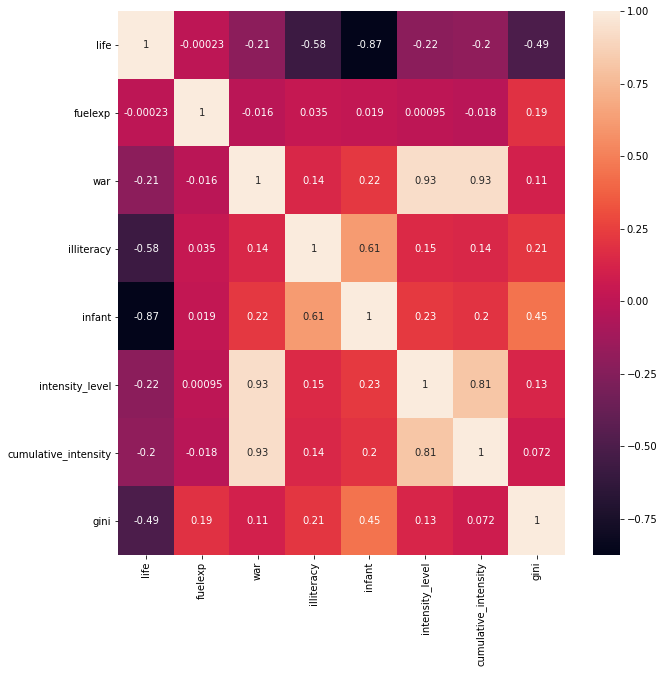

In [87]:
plt.figure(figsize=(10,10))
#df_part_1 = final_df[(final_df.year > 1960) & (final_df.year <= 2000)]
corrMatrix = final_df[wellbeing_features].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

With the current data, we can see no correlation between oil export and any of the variable that is an index of well-being. As a consequence, it does not make sense to look for causation.
The only possibly relevant feature is the gini index. Further integrations of the Gini score into the dataset may be necessary.

## 2. What are the variables that have the most influence in the prediction of a war?

1. Use random forests to predict a war in a country
3. Use the gini index to check the variables' importance - a la replication
4. If gini index seems to be relevant, integrate more data

intensity_level: nan -> 0
cumulative_intensity: 1 - > 2, 0 -> 1, nan -> 0

In [88]:
drop_cols = ['war', 'year', 'country', 'intensity_level', 'cumulative_intensity', 'milper', 'army85', 'sxpsq', 'elfo2', 'ef2']
x_df_no_gini = df_no_gini_clean.drop(drop_cols, axis=1)
y_df_no_gini = df_no_gini_clean.war
x_df_gini = df_gini_clean.drop(drop_cols, axis=1)
y_df_gini = df_gini_clean.war

In [89]:
df_no_gini_clean.war.values.sum()/len(df_no_gini_clean)

0.22898689677213166

In [90]:
df_gini_clean.war.values.sum()/len(df_gini_clean)

0.218609865470852

## Cross Validation

In [91]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.ensemble import  RandomForestClassifier

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_df_no_gini, y_df_no_gini, test_size=0.2)

In [93]:
n_estimators_list = range(50, 450, 50) if CFG["cross_val"] else [100]

score_means = []

for e in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=e)
    scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='f1')
    mean_score = np.mean(scores)
    score_means.append((rf, mean_score))
    print (f"n_estimators: {e}, mean score: {mean_score}")

rf_best, _ = max(score_means, key = lambda x : x[1])

n_estimators: 100, mean score: 0.8758326702647402


In [94]:
rf_best.fit(x_train, y_train)
rf_best.score(x_test, y_test)

0.9432907348242812

In [95]:
f1_score(rf.predict(x_test), y_test)

0.875219683655536

In [96]:
list(reversed(sorted(list(zip(rf_best.feature_importances_, x_train.columns)))))[:25]

[(0.06398533282460787, 'sxpnew'),
 (0.05724049743047782, 'lpopns'),
 (0.040774843500364526, 'trade'),
 (0.037652307870786515, 'numlang'),
 (0.03387995619649211, 'ehet'),
 (0.03230664896915378, 'nmgdp'),
 (0.031429271802852536, 'illiteracy'),
 (0.02942536078409095, 'agexp'),
 (0.0283668189630357, 'expgdp'),
 (0.02675586669957869, 'ln_gdpen'),
 (0.026204551516383016, 'ptime'),
 (0.02483977978335853, 'lmtnest'),
 (0.024728902685924467, 'infant'),
 (0.024098551466746852, 'dlang'),
 (0.023162740987414516, 'popdense'),
 (0.022112339148817075, 'elfo'),
 (0.020746285437678806, 'manuexp'),
 (0.020376556018379826, 'fuelexp'),
 (0.0186847039177979, 'second'),
 (0.017686788078157767, 'relfrac'),
 (0.01745230945293451, 'tnatwar'),
 (0.017414171002591447, 'ager'),
 (0.017333387811468225, 'drel'),
 (0.01565713647597894, 'avgnabo'),
 (0.01558192701957918, 'life')]

In [97]:
rf_notest = RandomForestClassifier()
rf_notest.fit(x_df_no_gini, y_df_no_gini)
top_N = 10
top_no_gini = [x[1] for x in 
               reversed(sorted(zip(rf_notest.feature_importances_, x_df_no_gini.columns), key = lambda x : x[0]))][:top_N]
top_no_gini

['sxpnew',
 'lpopns',
 'trade',
 'nmgdp',
 'illiteracy',
 'expgdp',
 'ehet',
 'numlang',
 'agexp',
 'ln_gdpen']

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_df_gini, y_df_gini, test_size=0.2)

In [99]:
n_estimators_list = range(50, 450, 50) if CFG["cross_val"] else [100]

score_means = []

for e in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=e)
    scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='f1')
    mean_score = np.mean(scores)
    score_means.append((rf, mean_score))
    print (f"n_estimators: {e}, mean score: {mean_score}")

rf_best, _ = max(score_means, key = lambda x : x[1])

n_estimators: 100, mean score: 0.842590075737004


In [100]:
rf_best.fit(x_train, y_train)
rf_best.score(x_test, y_test)

0.9328358208955224

In [101]:
f1_score(rf.predict(x_test), y_test)

0.8333333333333334

In [102]:
list(reversed(sorted(list(zip(rf_best.feature_importances_, x_train.columns)))))[:25]

[(0.050517760108444804, 'sxpnew'),
 (0.049000235451230896, 'illiteracy'),
 (0.0453829357275675, 'ehet'),
 (0.03984457139774796, 'lpopns'),
 (0.03785047058762028, 'nmgdp'),
 (0.03555768744367114, 'expgdp'),
 (0.03130552688149526, 'ln_gdpen'),
 (0.030933577498026974, 'dlang'),
 (0.02947134362904493, 'trade'),
 (0.02654204898182806, 'agexp'),
 (0.026211679110000302, 'numlang'),
 (0.025744754371963278, 'ef'),
 (0.02568135527364953, 'infant'),
 (0.02371422793919174, 'plural'),
 (0.023189161291594557, 'lmtnest'),
 (0.020926538823377968, 'ptime'),
 (0.018462051182783403, 'popdense'),
 (0.01834922142736824, 'ager'),
 (0.01816050298380773, 'elfo'),
 (0.017257738896164956, 'drel'),
 (0.017251335828205316, 'fuelexp'),
 (0.01614482117474922, 'life'),
 (0.016130478262531486, 'pri'),
 (0.01597272951875669, 'avgnabo'),
 (0.015852519650291823, 'manuexp')]

In [103]:
rf_notest = RandomForestClassifier()
rf_notest.fit(x_df_gini, y_df_gini)
top_gini = [x[1] for x in 
            reversed(sorted(zip(rf_notest.feature_importances_, x_df_gini.columns), key = lambda x : x[0]))][:top_N]
top_gini

['illiteracy',
 'ehet',
 'sxpnew',
 'nmgdp',
 'lpopns',
 'dlang',
 'trade',
 'expgdp',
 'plural',
 'numlang']

## Matching

In [104]:
import statsmodels.formula.api as smf

In [105]:
no_gini_matching = df_no_gini_clean[top_no_gini + ['oil33']]
no_gini_matching

,sxpnew,lpopns,trade,nmgdp,illiteracy,expgdp,ehet,numlang,agexp,ln_gdpen,oil33
16,0.158188,16.435966,11.157030,1324.000000,34.163884,4.132233,90.00000,8.000000,8.562673,-0.685179,0
17,0.158075,16.447903,12.550610,1351.333374,34.173826,4.453444,90.00000,8.000000,8.560198,-0.596020,0
18,0.157719,16.460052,14.227640,1366.333374,34.113043,4.878051,90.00000,8.000000,8.541015,-0.576253,0
19,0.157881,16.471003,26.035509,1451.333374,34.163517,9.171601,90.00000,8.000000,61.100498,-0.534435,0
20,0.157426,16.481419,26.944450,1610.000000,34.114133,8.888893,90.00000,8.000000,54.437160,-0.478036,0
...,...,...,...,...,...,...,...,...,...,...,...
7538,0.175017,16.235174,78.975510,3132.088135,15.200000,38.148930,24.00000,11.000000,6.760000,0.236829,0
7539,0.194624,16.255079,72.737373,3175.846436,14.400000,36.464649,24.00000,11.000000,7.620000,0.244755,0
7540,0.158606,16.274124,79.235222,4489.731853,13.600000,36.237110,24.00000,11.000000,10.590000,0.261856,0
7541,0.157868,16.293167,72.858179,4516.928076,12.800000,33.606768,24.00000,11.000000,8.514664,0.244217,0


In [106]:
gini_matching = df_gini_clean[top_gini + ['oil33']]
gini_matching

,illiteracy,ehet,sxpnew,nmgdp,lpopns,dlang,trade,expgdp,plural,numlang,oil33
108,18.615999,40.00000,0.158214,4513.332751,15.005181,10.000000,72.910596,33.647608,0.950000,6.000000,0
109,17.907000,40.00000,0.159307,4483.786223,15.016769,10.000000,73.068311,33.724493,0.950000,6.000000,0
110,17.252001,40.00000,0.157926,4515.625113,15.026502,10.000000,72.846979,33.611062,0.950000,6.000000,0
111,16.525000,40.00000,0.158231,4506.735495,15.036234,10.000000,72.807813,33.607854,0.950000,6.000000,0
112,15.951000,38.97891,0.157975,4511.260173,15.507487,23.179975,72.745194,33.570956,0.675123,6.035748,0
...,...,...,...,...,...,...,...,...,...,...,...
7538,15.200000,24.00000,0.175017,3132.088135,16.235174,22.000000,78.975510,38.148930,0.770000,11.000000,0
7539,14.400000,24.00000,0.194624,3175.846436,16.255079,22.000000,72.737373,36.464649,0.770000,11.000000,0
7540,13.600000,24.00000,0.158606,4489.731853,16.274124,22.000000,79.235222,36.237110,0.770000,11.000000,0
7541,12.800000,24.00000,0.157868,4516.928076,16.293167,22.000000,72.858179,33.606768,0.770000,11.000000,0


In [107]:
top_no_gini_no_fuelexp = [x for x in top_no_gini if x != "fuelexp"]

In [108]:
mod = smf.logit(formula='oil33 ~ ' + ' + '.join(top_no_gini_no_fuelexp), data=no_gini_matching)

res = mod.fit()

# Extract the estimated propensity scores
no_gini_matching.loc[:,('propensity_score')] =res.predict()


Optimization terminated successfully.
         Current function value: 0.181758
         Iterations 8


/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [109]:
import matplotlib.pyplot as plt
#plt.hist(pred_no_gini)

In [110]:
# Defining epsilon
eps=0.1

#Division based on the presence on oil33 or not
treatment_df = no_gini_matching[no_gini_matching['oil33'] == 1]
control_df = no_gini_matching[no_gini_matching['oil33'] == 0]

#function that defines the absolute value of difference of propensity scores
def get_difference(propensity_score1, propensity_score2):
    return np.abs(propensity_score1-propensity_score2)


# function to get matching pairs in treatment and control group
def match_treatment_control(treatment_df, control_df, eps=0.05):
    
    matching={} # empty map to store matching pairs
    matched=set([]) # set to store matched elements from control group

    # iterate through treatment group first as it is the smallest one
    for treatment_id, treatment_row in treatment_df.iterrows():
        lowest_diff=eps
        for control_id, control_row in control_df.iterrows():
            if control_id in matched: 
                continue # skip matched elements


            # Calculate the difference 
            difference = get_difference(control_row['propensity_score'],
                                        treatment_row['propensity_score'])

            # match lowest difference in a greedy manner
            if difference<eps:
                if difference<lowest_diff:
                    matching[treatment_id]=control_id
                    lowest_diff=difference

        # add matched elements to set
        if lowest_diff!=eps: # check if at least one matching was found
            matched.add(matching[treatment_id])

    
    return matching

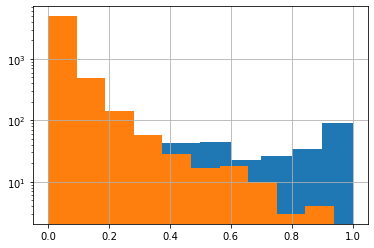

In [111]:
treatment_df['propensity_score'].hist().set_yscale('log')
control_df['propensity_score'].hist().set_yscale('log')
plt.show()

In [112]:
match_no_gini= match_treatment_control(treatment_df, control_df, eps=0.05)

In [113]:
pair_control = control_df.loc[match_no_gini.values()]
pair_treatment = treatment_df.loc[match_no_gini.keys()]

In [114]:
joined.loc[pair_control.index]["country"].unique()

array(['Germany', 'Brazil', 'Kuwait', 'Libya', 'Japan', 'Senegal',
       'Papua New Guinea', 'Netherlands', 'Mauritius', 'Singapore',
       'Zambia', 'Guyana', 'U.S.A.', 'Gambia', 'DR Congo (Zaire)',
       'Bolivia', 'Liberia', 'Tunisia', 'Denmark', 'Belgium',
       'Switzerland', 'Latvia', 'Honduras', 'Nigeria', 'Fiji', 'Greece',
       'Comoros', 'Yemen AR', 'Bahamas', 'Uganda', 'Cuba', 'Sweden',
       'Canada', 'Botswana', 'Mauritania', 'Niger', 'U.K.', 'Colombia',
       'Suriname', 'Togo', 'Russia (Soviet Union)', 'Ghana', 'Italy',
       'Yugoslavia', 'El Salvador', 'Costa Rica', 'Ireland',
       'Ivory Coast', 'Uruguay', 'Luxembourg', 'Burkina Faso', 'Lebanon',
       'Cyprus', 'Iran', 'Bulgaria', 'Australia', 'Malaysia', 'Iraq',
       'Somalia', 'Taiwan', 'Mexico', 'Finland', 'Guatemala', 'Portugal',
       'Romania', 'Myanmar (Burma)', 'Chad', 'Kyrgyzstan', 'Indonesia',
       'Armenia', 'India', 'Mongolia', 'Turkey', 'Syria', 'Sri Lanka',
       'C.A.R.', 'New Zealand'

In [115]:
joined.loc[pair_treatment.index]["country"].unique()

array(['Algeria', 'Angola', 'Bahamas', 'Bahrain', 'Benin', 'Bolivia',
       'Cameroon', 'Chad', 'Colombia', 'Congo (Braz)', 'Ecuador', 'Egypt',
       'Gabon', 'Indonesia', 'Iran', 'Iraq', 'Kenya', 'Kuwait', 'Mexico',
       'Nigeria', 'Norway', 'Oman', 'Panama', 'Papua New Guinea', 'Qatar',
       'Saudi Arabia', 'Senegal', 'Seychelles', 'Singapore', 'Syria',
       'Trinidad and Tobago', 'Tunisia', 'Russia', 'U.A.R.', 'Venezuela',
       'Yemen'], dtype=object)

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


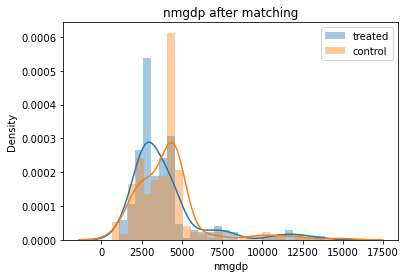

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


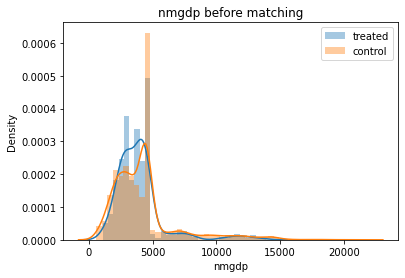

In [116]:
import seaborn as sns
#import matplotlib.pyplot as plt 
pair_control = control_df.loc[match_no_gini.values()]
pair_treatment = treatment_df.loc[match_no_gini.keys()]

ax = sns.distplot(pair_treatment['nmgdp'], hist=True, label='treated');
ax = sns.distplot(pair_control['nmgdp'], hist=True, label='control')
ax.set(title='nmgdp after matching',xlabel='nmgdp')
plt.legend()
plt.show()
ax = sns.distplot(treatment_df['nmgdp'], hist=True, label='treated');
ax = sns.distplot(control_df['nmgdp'], hist=True, label='control')
ax.set(title='nmgdp before matching',xlabel='nmgdp')
plt.legend()
plt.show()

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


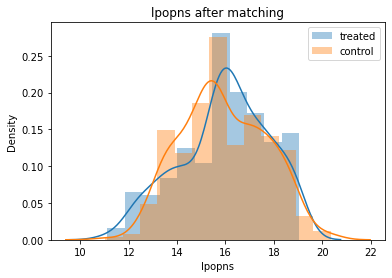

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


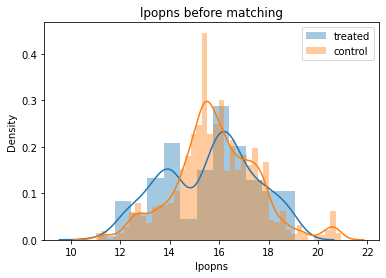

In [117]:
#import matplotlib.pyplot as plt 
pair_control = control_df.loc[match_no_gini.values()]
pair_treatment = treatment_df.loc[match_no_gini.keys()]

ax = sns.distplot(pair_treatment['lpopns'], hist=True, label='treated');
ax = sns.distplot(pair_control['lpopns'], hist=True, label='control')
ax.set(title='lpopns after matching',xlabel='lpopns')
plt.legend()
plt.show()
ax = sns.distplot(treatment_df['lpopns'], hist=True, label='treated');
ax = sns.distplot(control_df['lpopns'], hist=True, label='control')
ax.set(title='lpopns before matching',xlabel='lpopns')
plt.legend()
plt.show()

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


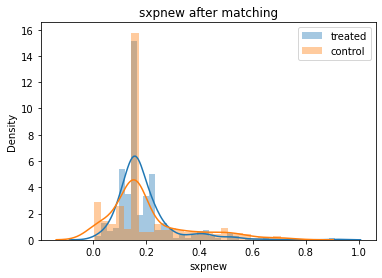

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


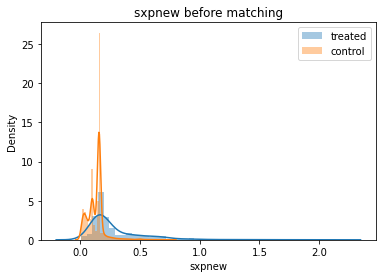

In [118]:
#import matplotlib.pyplot as plt 
pair_control = control_df.loc[match_no_gini.values()]
pair_treatment = treatment_df.loc[match_no_gini.keys()]

ax = sns.distplot(pair_treatment['sxpnew'], hist=True, label='treated');
ax = sns.distplot(pair_control['sxpnew'], hist=True, label='control')
ax.set(title='sxpnew after matching',xlabel='sxpnew')
plt.legend()
plt.show()
ax = sns.distplot(treatment_df['sxpnew'], hist=True, label='treated');
ax = sns.distplot(control_df['sxpnew'], hist=True, label='control')
ax.set(title='sxpnew before matching',xlabel='sxpnew')
plt.legend()
plt.show()

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


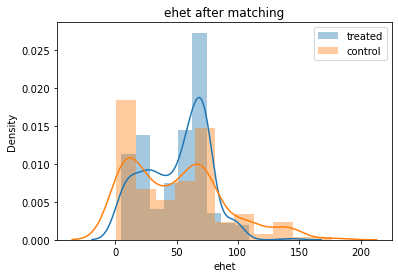

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


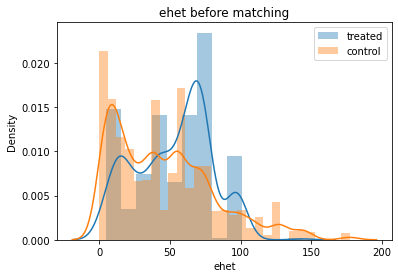

In [119]:
#import matplotlib.pyplot as plt 
pair_control = control_df.loc[match_no_gini.values()]
pair_treatment = treatment_df.loc[match_no_gini.keys()]

ax = sns.distplot(pair_treatment['ehet'], hist=True, label='treated');
ax = sns.distplot(pair_control['ehet'], hist=True, label='control')
ax.set(title='ehet after matching',xlabel='ehet')
plt.legend()
plt.show()
ax = sns.distplot(treatment_df['ehet'], hist=True, label='treated');
ax = sns.distplot(control_df['ehet'], hist=True, label='control')
ax.set(title='ehet before matching',xlabel='ehet')
plt.legend()
plt.show()

### Comment about matching
Looking at the four most influential features for the war we can see that the matching create a good balance between treatment (country-year with oil33 equal to 1) group and control group.

In [120]:
pair_treatment[['war', 'intensity_level']] = df_no_gini_clean[['war','intensity_level']].loc[pair_treatment.index]
pair_control[['war', 'intensity_level']] = df_no_gini_clean[['war', 'intensity_level']].loc[pair_control.index]

In [121]:
#Function to calculate bootstrap confidence intervals
def bootstrap_CI(data, nbr_draws, func, lo_qt=2.5, hi_qt=97.5):
    probs = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        probs[n] = func(data_tmp) # apply function

    return np.nanpercentile(probs, lo_qt), np.nanpercentile(probs, hi_qt), probs.mean()

In [122]:
differences_y=pair_treatment['war'].values-pair_control['war'].values
ATE = np.mean(differences_y)
lo_ATE,up_ATE,_=bootstrap_CI(differences_y, 1000, lambda x : x.mean(), lo_qt=2.5, hi_qt=97.5)
print(f"ATE is equal to: {ATE:.3}, the 95%-confidence interval is ({lo_ATE:.3},{up_ATE:.3})")

ATE is equal to: 0.188, the 95%-confidence interval is (0.133,0.246)


### Comment about result (ATE)
The ATE obtained shows that there is evidence of a weak influence of oil exportation in the presence of war in a country.

In [123]:
pair_treatment['intense_war']=pair_treatment['intensity_level'].apply(lambda i: max(i-1,0))
pair_control['intense_war']=pair_control['intensity_level'].apply(lambda i: max(i-1,0))

In [124]:
differences_y=pair_treatment['intense_war'].values-pair_control['intense_war'].values
ATE = np.mean(differences_y)
lo_ATE,up_ATE,_=bootstrap_CI(differences_y, 1000, lambda x : x.mean(), lo_qt=2.5, hi_qt=97.5)
print(f"ATE is equal to: {ATE:.3}, the 95%-confidence interval is ({lo_ATE:.3},{up_ATE:.3})")

ATE is equal to: 0.0841, the 95%-confidence interval is (0.0464,0.122)


### Matching on Gini

In [125]:
top_gini_no_fuelexp = [x for x in top_gini if x != "fuelexp"]

In [126]:
mod = smf.logit(formula='oil33 ~ ' + ' + '.join(top_gini_no_fuelexp), data=gini_matching)

res = mod.fit()

# Extract the estimated propensity scores
gini_matching.loc[:,('propensity_score')] =res.predict()


Optimization terminated successfully.
         Current function value: 0.178123
         Iterations 8


/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [127]:
#Division based on the presence on oil33 or not
treatment_df = gini_matching[gini_matching['oil33'] == 1]
control_df = gini_matching[gini_matching['oil33'] == 0]

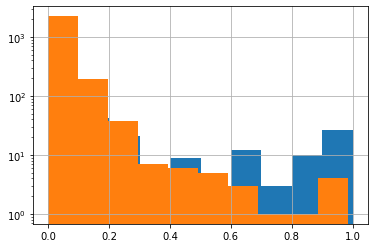

In [128]:
treatment_df['propensity_score'].hist().set_yscale('log')
control_df['propensity_score'].hist().set_yscale('log')
plt.show()

In [129]:
match_gini= match_treatment_control(treatment_df, control_df, eps=0.05)

In [130]:
len(match_gini)

143

In [131]:
pair_control = control_df.loc[match_gini.values()]
pair_treatment = treatment_df.loc[match_gini.keys()]

In [132]:
joined.loc[pair_control.index]["country"].unique()

array(['Yugoslavia', 'Niger', 'Pakistan', 'U.K.', 'Malaysia', 'Mexico',
       'Korea, South', 'Malawi', 'Zambia', 'Chile', 'Taiwan',
       'DR Congo (Zaire)', 'Liberia', 'Uganda', 'Belgium', 'Angola',
       'Tunisia', 'Luxembourg', 'Somalia', 'Mauritania', 'Gambia',
       'Colombia', 'Singapore', 'Germany', 'Madagascar', 'Australia',
       'C.A.R.', 'Dominican Republic', 'Tanzania', 'Hungary', 'France',
       'Sri Lanka', 'Togo', 'Rwanda', 'Morocco', 'Canada', 'Lebanon',
       'Netherlands', 'Vietnam', 'Sudan', 'Iraq', 'Brazil', 'Ghana',
       'New Zealand', 'Georgia', 'U.S.A.', 'Mauritius', 'Argentina',
       'Comoros', 'Turkey', 'Uruguay', 'Mongolia', 'China',
       'Turkmenistan', 'Nigeria', 'Iran', 'Thailand', 'Mali', 'Japan',
       'Denmark', 'Syria', 'Greece', 'Czechoslovakia', 'Djibouti',
       'Gabon', 'Ivory Coast', 'Bosnia-Herzegovina'], dtype=object)

In [133]:
joined.loc[pair_treatment.index]["country"].unique()

array(['Algeria', 'Angola', 'Bahamas', 'Bahrain', 'Bolivia', 'Cameroon',
       'Colombia', 'Congo (Braz)', 'Ecuador', 'Egypt', 'Gabon',
       'Indonesia', 'Iran', 'Kuwait', 'Mexico', 'Nigeria', 'Norway',
       'Oman', 'Qatar', 'Saudi Arabia', 'Singapore', 'Syria',
       'Trinidad and Tobago', 'Tunisia', 'Russia', 'Venezuela', 'Yemen'],
      dtype=object)

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


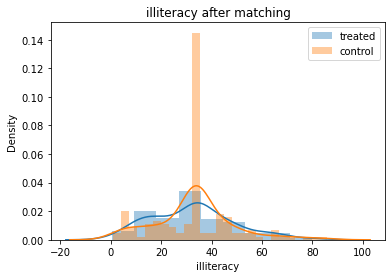

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


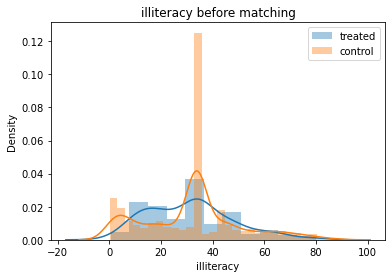

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


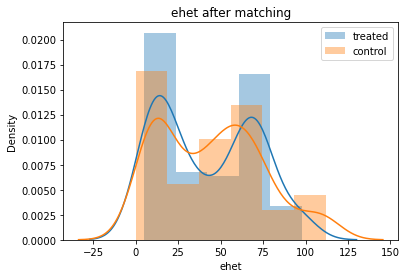

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


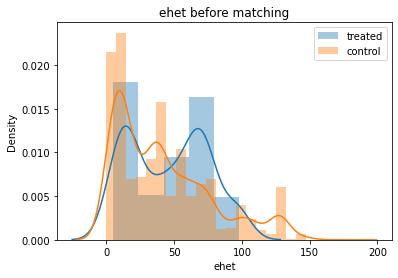

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


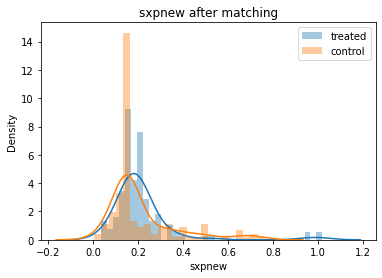

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


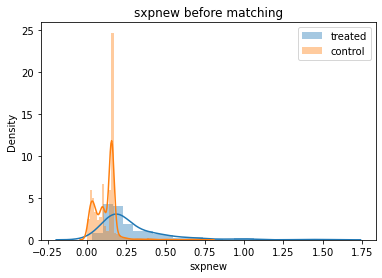

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


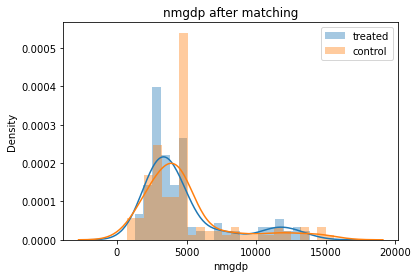

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


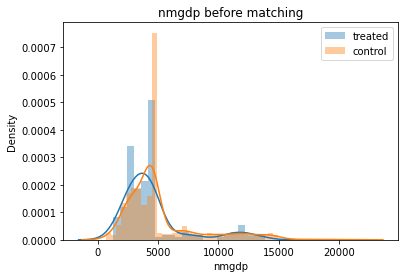

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


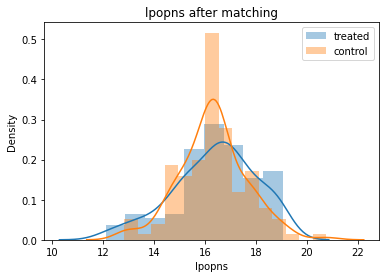

/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giorgio/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


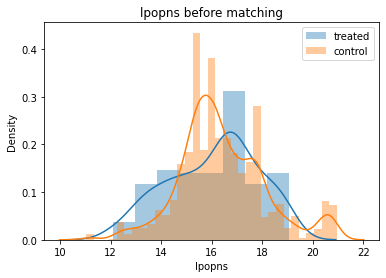

In [134]:

for var in top_gini[:5]:
    ax = sns.distplot(pair_treatment[var], hist=True, label='treated');
    ax = sns.distplot(pair_control[var], hist=True, label='control')
    ax.set(title=f'{var} after matching',xlabel=var)
    plt.legend()
    plt.show()
    ax = sns.distplot(treatment_df[var], hist=True, label='treated');
    ax = sns.distplot(control_df[var], hist=True, label='control')
    ax.set(title=f'{var} before matching',xlabel=var)
    plt.legend()
    plt.show()

In [135]:
pair_treatment[['war', 'intensity_level']] = df_gini_clean[['war','intensity_level']].loc[pair_treatment.index]
pair_control[['war', 'intensity_level']] = df_gini_clean[['war', 'intensity_level']].loc[pair_control.index]

In [136]:
differences_y=pair_treatment['war'].values-pair_control['war'].values
ATE = np.mean(differences_y)
lo_ATE,up_ATE,_=bootstrap_CI(differences_y, 1000, lambda x : x.mean(), lo_qt=2.5, hi_qt=97.5)
print(f"ATE is equal to: {ATE:.3}, the 95%-confidence interval is ({lo_ATE:.3},{up_ATE:.3})")

ATE is equal to: 0.238, the 95%-confidence interval is (0.154,0.329)
